In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install yfinance
#!pip install pandas_ta
import yfinance as yf
import pandas_ta as ta

In [ ]:
df = pd.read_csv("rice.csv")
df.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2011,201101,January 2011,4,0,2,Exports,586,Pakistan,NaN,634,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,Wheat and meslin,NaN,NaN,NaN,NaN,NaN,NaN,124000.0,NaN,42016,NaN,NaN,0
1,HS,2011,201101,January 2011,4,0,2,Exports,586,Pakistan,NaN,784,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,Wheat and meslin,NaN,NaN,NaN,NaN,NaN,NaN,1351000.0,NaN,459969,NaN,NaN,0
2,HS,2011,201102,February 2011,4,0,2,Exports,586,Pakistan,NaN,682,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,Wheat and meslin,NaN,NaN,NaN,NaN,NaN,NaN,339000.0,NaN,103745,NaN,NaN,0
3,HS,2011,201102,February 2011,4,0,2,Exports,586,Pakistan,NaN,784,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,Wheat and meslin,NaN,NaN,NaN,NaN,NaN,NaN,3092000.0,NaN,1052168,NaN,NaN,0
4,HS,2011,201103,March 2011,4,0,2,Exports,586,Pakistan,NaN,634,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1001,Wheat and meslin,NaN,NaN,NaN,NaN,NaN,NaN,14000000.0,NaN,4765370,NaN,NaN,0


In [ ]:
df.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

In [ ]:
#columns to use
columns = ["Period",  "Trade Value (US$)"]
df = df[columns]
df.head()

,Period,Trade Value (US$)
0,201101,42016
1,201101,459969
2,201102,103745
3,201102,1052168
4,201103,4765370


**Data Preprocessing**

In [ ]:
#data preprocessing#
#df.rename(columns = {'Trade.Flow':'Trade_Flow'}, inplace = True)
df.rename(columns = {'Trade Value (US$)':'Value_In_Dollars'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_export = df[df["Trade_Flow"] == "Export"]
df_import = df[df["Trade_Flow"] == "Import"]

In [ ]:
df_export.head()

,Year,Trade_Flow,Value_In_Dollars
1,2017,Export,3560300692
3,2018,Export,3802499708
5,2019,Export,4030369559
7,2020,Export,4141846579
9,2021,Export,6076912908


In [ ]:
df_import.head()

,Year,Trade_Flow,Value_In_Dollars
0,2017,Import,2842546760
2,2018,Import,2946714821
4,2019,Import,2611001633
6,2020,Import,2583822398
8,2021,Import,3829896996


In [ ]:
df = df_export

In [ ]:
df['RSI']=ta.rsi(df.Value_In_Dollars, length=2)
df['EMAF']=ta.ema(df.Value_In_Dollars, length=4)
df['EMAM']=ta.ema(df.Value_In_Dollars, length=10)
df['EMAS']=ta.ema(df.Value_In_Dollars, length=15)

df['Target'] = df['Value_In_Dollars'].shift(-1)

df.drop(['Period'], axis=1, inplace=True)
df.dropna(inplace = True)

# df.loc[df["Trade_Flow"] == "Import", "Trade_Flow"] = 0
# df.loc[df["Trade_Flow"] == "Export", "Trade_Flow"] = 1

df.head()

<ipython-input-57-0ad4a68a9c34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI']=ta.rsi(df.Value_In_Dollars, length=2)
<ipython-input-57-0ad4a68a9c34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMAF']=ta.ema(df.Value_In_Dollars, length=4)
<ipython-input-57-0ad4a68a9c34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,Value_In_Dollars,RSI,EMAF,EMAM,EMAS,Target
28,16956,23.694464,155205.408113,946063.985749,1.583533e+06,360954.0
29,360954,73.969805,237504.844868,839680.351977,1.430710e+06,97299.0
30,97299,36.801422,181422.506921,704701.924345,1.264034e+06,288601.0
31,288601,63.451633,224293.904152,629047.210827,1.142105e+06,502574.0
32,502574,81.192901,335605.942491,606052.081586,1.062163e+06,3489.0


In [ ]:
data_set = df.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)

,Value_In_Dollars,RSI,EMAF,EMAM,EMAS,Target
28,16956,23.694464,1.552054e+05,9.460640e+05,1.583533e+06,360954.0
29,360954,73.969805,2.375048e+05,8.396804e+05,1.430710e+06,97299.0
30,97299,36.801422,1.814225e+05,7.047019e+05,1.264034e+06,288601.0
31,288601,63.451633,2.242939e+05,6.290472e+05,1.142105e+06,502574.0
32,502574,81.192901,3.356059e+05,6.060521e+05,1.062163e+06,3489.0
33,3489,24.871868,2.027592e+05,4.964952e+05,9.298292e+05,288757.0
34,288757,58.098685,2.371583e+05,4.587246e+05,8.496952e+05,100287.0
35,100287,36.669355,1.824098e+05,3.935541e+05,7.560191e+05,158432.0
36,158432,48.410352,1.728187e+05,3.508046e+05,6.813207e+05,9316456.0
37,9316456,99.131483,3.830274e+06,1.980923e+06,1.760713e+06,11944129.0


In [ ]:
data_set.shape

(742, 6)

In [ ]:
data_set.head()

,Value_In_Dollars,RSI,EMAF,EMAM,EMAS,Target
28,16956,23.694464,155205.408113,946063.985749,1.583533e+06,360954.0
29,360954,73.969805,237504.844868,839680.351977,1.430710e+06,97299.0
30,97299,36.801422,181422.506921,704701.924345,1.264034e+06,288601.0
31,288601,63.451633,224293.904152,629047.210827,1.142105e+06,502574.0
32,502574,81.192901,335605.942491,606052.081586,1.062163e+06,3489.0


In [ ]:
data_set.drop(['Value_In_Dollars'], axis=1, inplace=True)

In [ ]:
data_set.head()

,RSI,EMAF,EMAM,EMAS,Target
28,23.694464,155205.408113,946063.985749,1.583533e+06,360954.0
29,73.969805,237504.844868,839680.351977,1.430710e+06,97299.0
30,36.801422,181422.506921,704701.924345,1.264034e+06,288601.0
31,63.451633,224293.904152,629047.210827,1.142105e+06,502574.0
32,81.192901,335605.942491,606052.081586,1.062163e+06,3489.0


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.18879664 0.00562338 0.04018438 0.07073597 0.00926986]
 [0.72394747 0.0095512  0.0330027  0.05875427 0.00246207]
 [0.32831234 0.00687462 0.02389067 0.04568636 0.00740165]
 ...
 [0.28191404 0.20105147 0.43055667 0.49695238 0.22023517]
 [0.66403783 0.28278328 0.45268161 0.51176594 0.43800013]
 [0.84247621 0.49282485 0.57429949 0.60738096 0.00208072]]


In [ ]:
data_set_scaled.shape

(742, 5)

In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 3
print(data_set_scaled.shape[0])
for j in range(4):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
print(X)
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


742
[[array([0.18879664, 0.72394747, 0.32831234]), array([0.72394747, 0.32831234, 0.61198785]), array([0.32831234, 0.61198785, 0.80083299]), array([0.61198785, 0.80083299, 0.2013294 ]), array([0.80083299, 0.2013294 , 0.55500893]), array([0.2013294 , 0.55500893, 0.32690657]), array([0.55500893, 0.32690657, 0.45188244]), array([0.32690657, 0.45188244, 0.99177843]), array([0.45188244, 0.99177843, 0.99511297]), array([0.99177843, 0.99511297, 1.        ]), array([0.99511297, 1.        , 0.23796028]), array([1.        , 0.23796028, 0.20075062]), array([0.23796028, 0.20075062, 0.51807173]), array([0.20075062, 0.51807173, 0.60330985]), array([0.51807173, 0.60330985, 0.24969413]), array([0.60330985, 0.24969413, 0.69178771]), array([0.24969413, 0.69178771, 0.87968175]), array([0.69178771, 0.87968175, 0.25200749]), array([0.87968175, 0.25200749, 0.17786578]), array([0.25200749, 0.17786578, 0.38201448]), array([0.17786578, 0.38201448, 0.70772947]), array([0.38201448, 0.70772947, 0.91593989]), arra

In [ ]:
print(X.shape)
print(y.shape)

(739, 3, 4)
(739, 1)


In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]


591


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(591, 3, 4)
(148, 3, 4)
(591, 1)
(148, 1)


In [ ]:
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 4), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1,verbose=0)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 3, 4)]            0         
                                                                 
 first_layer (LSTM)          (None, 150)               93000     
                                                                 
 dense_layer (Dense)         (None, 1)                 151       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 93,151
Trainable params: 93,151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
    print(y_pred[i], y_test[i])

5/5 [==============================] - 0s 5ms/step
[0.13014913] [0.20338049]
[0.16247478] [0.41867424]
[0.09100459] [0.00025914]
[0.03540612] [0.00194614]
[0.15442029] [0.10987808]
[0.24465674] [0.22438006]
[0.2412613] [0.02218958]
[0.10027768] [0.1603735]
[0.14162442] [0.44614904]
[0.16874474] [0.0802787]
[0.07931379] [0.00052326]
[0.15100494] [0.03096564]
[0.26402393] [0.19932034]
[0.32643902] [0.35936989]
[0.16093823] [0.0040035]
[0.06083447] [0.00936666]
[0.15420881] [0.02230492]
[0.24636239] [0.21105235]
[0.268629] [0.70169609]
[0.11885422] [0.01764898]
[0.00252993] [0.39447833]
[0.14605962] [0.0157756]
[0.2361367] [0.0342342]
[0.3070372] [0.32253285]
[0.34846348] [0.24588167]
[0.22561029] [0.02955182]
[0.12994434] [0.00134354]
[0.21446657] [0.28713229]
[0.33192313] [0.03466283]
[0.23160538] [0.90892504]
[0.13491285] [0.01335134]
[0.05908789] [0.52901578]
[0.16751137] [0.01118608]
[0.2721427] [0.00040211]
[0.3496988] [0.01988956]
[0.43596634] [0.24842311]
[0.3764876] [0.02899856]


In [ ]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred, squared=False)
accuracy = 1 - errors
print("Accuracy:", accuracy*100, "%")

Accuracy: 82.28113965646267 %


AttributeError: ignored

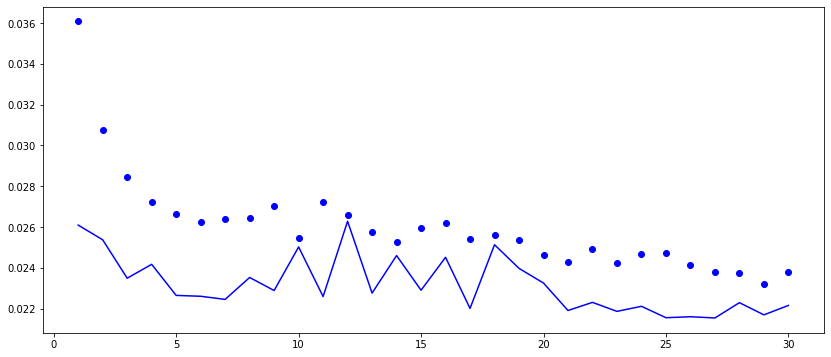

In [ ]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
ax = plt.figure(figsize=(14, 6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
ax.set_title('Training & Validation Loss', fontsize=16)
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
plt.legend()

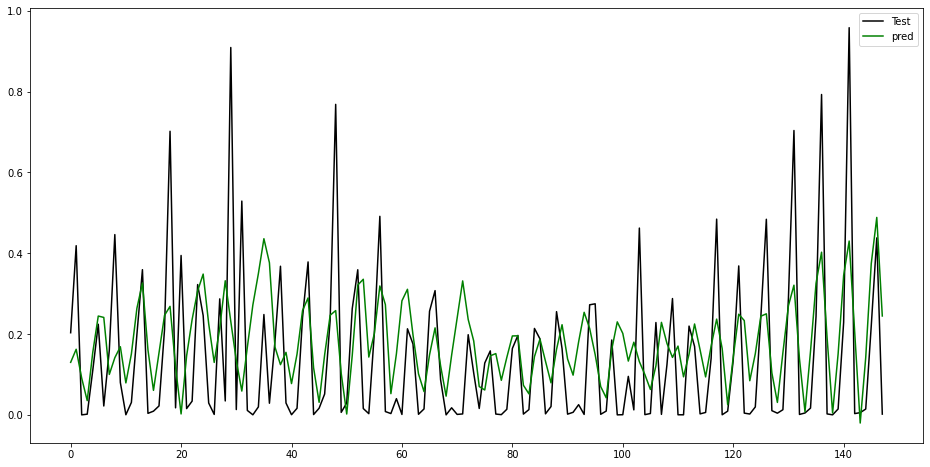

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [ ]:
print(X_test[1][0])

[[0.56292698 0.14693871 0.19094584 0.22095855]
 [0.21341267 0.10203114 0.1612977  0.19414718]
 [0.27719187 0.079498   0.13987643 0.1729519 ]]
